 # Lab: Decision trees, part 3
 With Scikit-Learn, the quality of your decision tree will depend a lot on how you select hyperparameters.  The purpose of this lab is to help you get familiar with the hyperparameters of DecisionTreeRegressor.
 The lab is quite open-ended.  I want you to predict CPU performance using a regression tree.  First create a file with this starter code shown on the next page.
 Next, do the following:
 * pick some predictors, and create training and test sets
 * create a DecisionTreeRegressor, and set some of the hyperparameters listed in lecture:
     * min_samples_split, max_depth, min_samples_leaf, max_leaf_nodes, min_impurity_decrease
 * train your tree and see what it looks like
 * compute the RMSE for your model on the test data  ("test RMSE")
 Do this a bunch of times to see how the hyperparameters affect the appearance of your tree and your test RMSE.
 Be careful not to create a giant tree.  Trying to plot a giant tree can bring your machine to a standstill.
 If you have time, try doing a grid search with cross validation to find the best hyperparameter settings.


In [26]:
import numpy as np
import pandas as pd
from matplotlib import rcParams
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
import seaborn as sns
import graphviz 

In [27]:

# switch to seaborn default stylistic parameters
sns.set()
# larger plot fonts
sns.set_context('talk')
# change default plot size
rcParams['figure.figsize'] = 10,8

In [28]:

# read the cpu data
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/machine.csv")
df.index = df['vendor']+' '+df['model']
df.drop(['vendor', 'model'], axis=1, inplace=True)
df['cs'] = np.round(1e3/df['myct'], 2)    # clock speed in MHz

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, adviser 32/60 to wang vs-90
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   myct    209 non-null    int64  
 1   mmin    209 non-null    int64  
 2   mmax    209 non-null    int64  
 3   cach    209 non-null    int64  
 4   chmin   209 non-null    int64  
 5   chmax   209 non-null    int64  
 6   prp     209 non-null    int64  
 7   erp     209 non-null    int64  
 8   cs      209 non-null    float64
dtypes: float64(1), int64(8)
memory usage: 16.3+ KB


<AxesSubplot:>

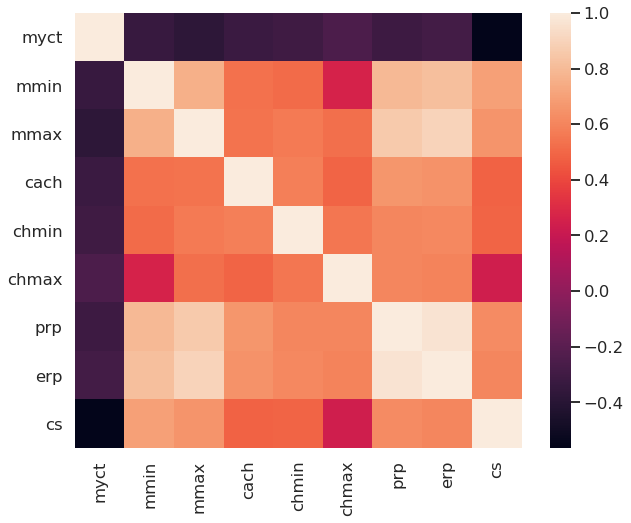

In [30]:
sns.heatmap(df.corr())

In [31]:

# get ready for Scikit-Learn
predictors = ['mmin', 'mmax']      # choose predictors as you like
target = 'prp'
X = df[predictors].values
y = df[target].values

# test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# train the model
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

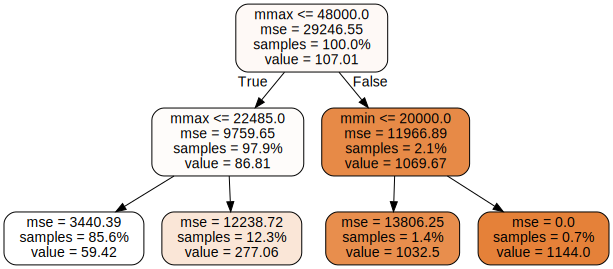

In [32]:

# view the tree
# conda install python-graphviz
dot_data = export_graphviz(reg, precision=2,
                     feature_names=predictors,  
                     proportion=True,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)  
graph

In [33]:

# make predictions and compute error
y_predict = reg.predict(X_test)
errors = y_test - y_predict
rmse = np.sqrt((errors**2).mean())
print('rmse: {:0.2f}'.format(rmse))




rmse: 81.98
